## Lending club case study

### Data description
**Loan data**
It contains the complete loan data for all loans issued through the time period 2007 to 2011.

**Data dictionary**
It describes the meaning of these variables provided in loan data.

### Business problem
The data given above contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

### Goals
We will approach our analysis w.r.to below common goals:

#### Data Dictionary Analysis
   - Data size
   - Remove null values
   
#### Loan data analysis

**1. Know Your Data**
   - Data size
   - Columns and thier data types
   - Check data spread
   - Numeric vs Categorical Columns   

**2. Data Quality & Fix**
   - Check null values
   - delete irrelevant features
   - impute null values
   - check duplicates

**3. Data Content Analysis**
   - Univariate Analysis
   - Bivariate Analysis
   - Correlation b/w features

**4. Derived Features/Metrics**

**5. Conclusion**



In [118]:
import pandas as pd

In [119]:
# Load the data dictionary and loan data into pandas
data_dictionary = pd.read_excel('Data_Dictionary.xlsx')
loan_data = pd.read_csv('loan.csv')

c:\users\nikhi\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


###  Data Dictionary Analysis
   - Data size
   - Remove null values

In [120]:
data_dictionary.shape

(117, 2)

In [121]:
data_dictionary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  115 non-null    object
 1   Description  116 non-null    object
dtypes: object(2)
memory usage: 1000.0+ bytes


In [122]:
# We see a few NaN's in the end.
data_dictionary.head().append(data_dictionary.tail())

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN
116,NaN,* Employer Title replaces Employer Name for al...


In [123]:
# Cleaning up null values, as there are only 3 nulls and they are not used.
data_dictionary.dropna(inplace=True)

In [124]:
data_dictionary.shape

(115, 2)

#### Conclusion of Data dictionary analysis
We noticed that there are only 3 nulls. Apart from that data looks clean. We removed that as part of initial analysis.
Now, we have a clean data dictionary, ready for use.

## Loan data analysis

### 1. Know You Data

In [125]:
loan_data.shape

(39717, 111)

In [126]:
loan_data.info(max_cols=111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                 

In [127]:
all_null_column_percentage = 100 * (loan_data.isna().all(axis=0).sum() / loan_data.columns.size)
print('%.2f' % all_null_column_percentage, 'percent columns have 0 non-null values')

some_null_column_percentage = 100 * ((loan_data.isna().any(axis=0).sum() / loan_data.columns.size)) - all_null_column_percentage
print('%.2f' % some_null_column_percentage, 'percent columns have some non-null values (excluding complete non-nulls)')

48.65 percent columns have 0 non-null values
12.61 percent columns have some non-null values (excluding complete non-nulls)


Notice there are many columns with 0 non-null values, and a few with some non-nulls

In [128]:
# Check Categorical and Numerical variables
loan_data.dtypes.value_counts()

float64    74
object     24
int64      13
dtype: int64

In [129]:
# See all the columns that contain categorical data
cat_columns = list(loan_data.select_dtypes(include="object"))
cat_columns

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']

Certain columns like `int_rate` and `emp_length` can fall into numerical variables

We can check the unique values for each columns. This will be helpful to understand if we have **univariate data**, or **binary data**, any **ordinal data**, or any **continuous data**. Based on this, we can later think of binning these continuous values.

In [130]:
# For each numerical feature compute number of unique entries
unique_values = loan_data.nunique().sort_values()
unique_values[unique_values > 0]

policy_code                       1
collections_12_mths_ex_med        1
acc_now_delinq                    1
application_type                  1
tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
pymnt_plan                        1
initial_list_status               1
next_pymnt_d                      2
term                              2
loan_status                       3
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

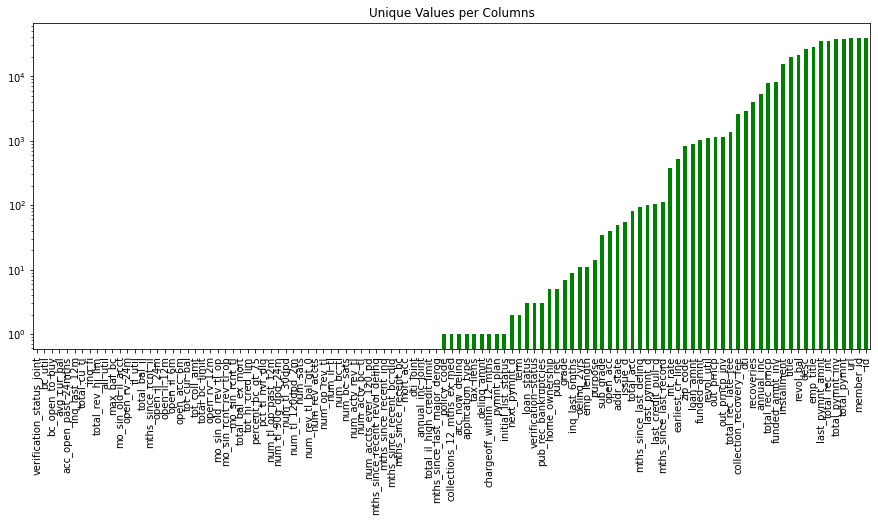

In [131]:
# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 6), title="Unique Values per Columns", color = "green");

In [132]:
# Fix scientific calculation
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


#### Conclusion of section 1. Know Your Data
Now, we have a good understanding of our data. We know that out data size is (39717 X 111). Almost half of these columns also have only null values, few have some null values. We have 87 numerical features and 24 categorical features in our dataset. We have also seen their distributions and plotted their unique values. We noticed that few columns have a single value for entire data

### 2. Data Quality & Fix
   - Check null values
   - Check duplicates
   - Remove irrelevant features
   - impute null values
   - Outlier detection and removal

#### 2.1 Check null values

We know from previous step that half of the columns are null. Let's clean that up.

In [133]:
loan_data.dropna(axis=1, how='all', inplace=True)

In [134]:
# Shape of data has changes with less columns
loan_data.shape

(39717, 57)

#### 2.2 Check duplicates

`id`, `member_id`, and `url` are the unique identifiers of the data-set. We can ignore them and check if we have any duplicate rows.

In [135]:
    # We can't find any row duplicates
    row_duplicates = loan_data.drop(labels=['id', 'member_id', 'url'], axis=1).duplicated().sum()
    row_duplicates

0

#### 2.3 Remove irrelevant features

Let's begin with calculating the percentage of null values in each column

In [136]:
# We could also have done loan_data.isna().sum() but that's very slow in comparision to this approach. Count is read from 
# metadata and is served way faster.
# My jupyter kept dying if I used other method which looks cleaner, so shifted to the faster approach.

null_counts = loan_data.shape[0] - loan_data.count()

In [137]:
# Check columns with greater than 3 percent nulls

total_rows = loan_data.shape[0]
null_count_percentage = 100 * null_counts / total_rows
null_count_percentage[null_count_percentage > 3]

emp_title                  6.191303
desc                      32.580507
mths_since_last_delinq    64.662487
mths_since_last_record    92.985372
next_pymnt_d              97.129693
dtype: float64

In [138]:
# This feature is useful in further analysis, to determine why user took the loan
with pd.option_context('display.max_colwidth', None):  # set local option to None
    print(loan_data['desc'].value_counts().head(20).index)

Index([' ', 'Debt Consolidation', 'Camping Membership', 'Personal Loan',
       'personal loan', 'credit card debt consolidation',
       'credit card consolidation', 'refinancing', 'consolidate debt',
       'consolidate credit cards',
       '  Borrower added on 12/06/11 > Debt consolidation<br>',
       '  Borrower added on 09/21/11 > Debt consolidation<br/>',
       'Motorcycle Loan',
       'I will use the loan and pay off all of my outstanding credit card debts that are spread out. It would be great to just focus on paying back one lender with a lower interest rate and not have to worry about keeping track each CC individually.',
       'This loan would be to consolidate my credit card debts, and have one payment at a reasonable interest rate.',
       'Debt consolidation', 'debt consolidation', 'consolidation',
       'Consolidate',
       'I have 2nd mortgage on a rental property with balance of $109k.  I have cash flow of $85k and plan to pay off the 2nd mortgage using this lo

In [139]:
# This contains company information and looks important paramater in further analysis
loan_data['emp_title'].value_counts()

US Army                            134
Bank of America                    109
IBM                                 66
AT&T                                59
Kaiser Permanente                   56
                                  ... 
Online Trading Academy               1
Frys Electronics                     1
TNG                                  1
American Seafoods International      1
Jerry's Famous Deli                  1
Name: emp_title, Length: 28820, dtype: int64

In [140]:
# We can mark null values as Non-deliquent
with pd.option_context('display.max_colwidth', None):
    print(data_dictionary[data_dictionary.LoanStatNew == 'mths_since_last_delinq'].Description)

50    The number of months since the borrower's last delinquency.
Name: Description, dtype: object


In [141]:
# We can compare the default with public record update
with pd.option_context('display.max_colwidth', None):
    print(data_dictionary[data_dictionary.LoanStatNew == 'mths_since_last_record'].Description)

52    The number of months since the last public record.
Name: Description, dtype: object


In [142]:
loan_data['mths_since_last_record'].value_counts()

0.0      670
104.0     61
89.0      60
113.0     59
111.0     57
        ... 
14.0       1
5.0        1
19.0       1
120.0      1
6.0        1
Name: mths_since_last_record, Length: 111, dtype: int64

In [143]:
# This column will be useful for testing our model in future, but not for the current objective. We are interested only
# in defaulters and non-defaulters for this analysis.
# We can remove this field. 
with pd.option_context('display.max_colwidth', None):
    print(data_dictionary[data_dictionary.LoanStatNew == 'next_pymnt_d'].Description)


58    Next scheduled payment date
Name: Description, dtype: object


In [144]:
loan_data.drop(labels='next_pymnt_d', axis=1, inplace=True)

In [145]:
loan_data.shape

(39717, 56)

#### 2.4 Impute nulls

In [147]:
null_count_percentage[null_count_percentage > 0]

emp_title                      6.191303
emp_length                     2.706650
desc                          32.580507
title                          0.027696
mths_since_last_delinq        64.662487
mths_since_last_record        92.985372
revol_util                     0.125891
last_pymnt_d                   0.178765
next_pymnt_d                  97.129693
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64

In [163]:

loan_data.emp_title.apply(lambda x: print())

RangeIndex(start=0, stop=39717, step=1)